# **Econometrics 2**

# PC-Lab Session 2: Asymptotic Variance

**Author:** [Anthony Strittmatter](http://www.anthonystrittmatter.com)

We estimate the OLS coefficients and asymptotic variance using matrix algebra. In the first place, we have to load some packages. 

In [2]:
########################  Load Packages  ########################

# List of required packages
pkgs <- c('psych', 'ggplot2', 'dplyr', 'sampling')

# Load packages
for(pkg in pkgs){
    library(pkg, character.only = TRUE)
}

print('All packages successfully installed and loaded.')

[1] "All packages successfully installed and loaded."


## Data Generating Process (DGP)

We generate an artificial dataset ($N=200$). We consider the linear model,
\begin{equation*}
y= \beta_0 + \beta_1 x_1 + u,
\end{equation*}
with $\beta_0=0$, $\beta_1=1$, and $x_1,u \sim N(0,1)$.

In [3]:
############## Data Generating Process (DGP) ##############
set.seed(1001)

N <- 200 # sample size

# Generate variables
x0 <- matrix(1, nrow = N, ncol = 1) # intercept (vector of one'S)
x1 <- matrix(rnorm(N), nrow = N, ncol = 1) # standard normal distributed covariate
X <- cbind(x0,x1) # matrix of covariates
u <- matrix(rnorm(N), nrow = N, ncol = 1) # standard normal distributed error term
y <- x1 + u # outcome variable
# the true effect of x1 on y is 1
# the true intercept is 0

dataset <- as.data.frame(cbind(y,x1)) # dataframe will be needed later

print('Data is generated.')

[1] "Data is generated."


## Descriptive Statistics

In [4]:
############## Descriptive Statistics ##############

round(describe(dataset), digits=3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
V1,1,200,0.022,1.446,0.038,0.005,1.568,-3.505,4.697,8.202,0.180,-0.140,0.102
V2,2,200,0.003,0.986,0.047,-0.034,0.996,-2.507,3.385,5.892,0.321,0.117,0.070


## Scatter Plot

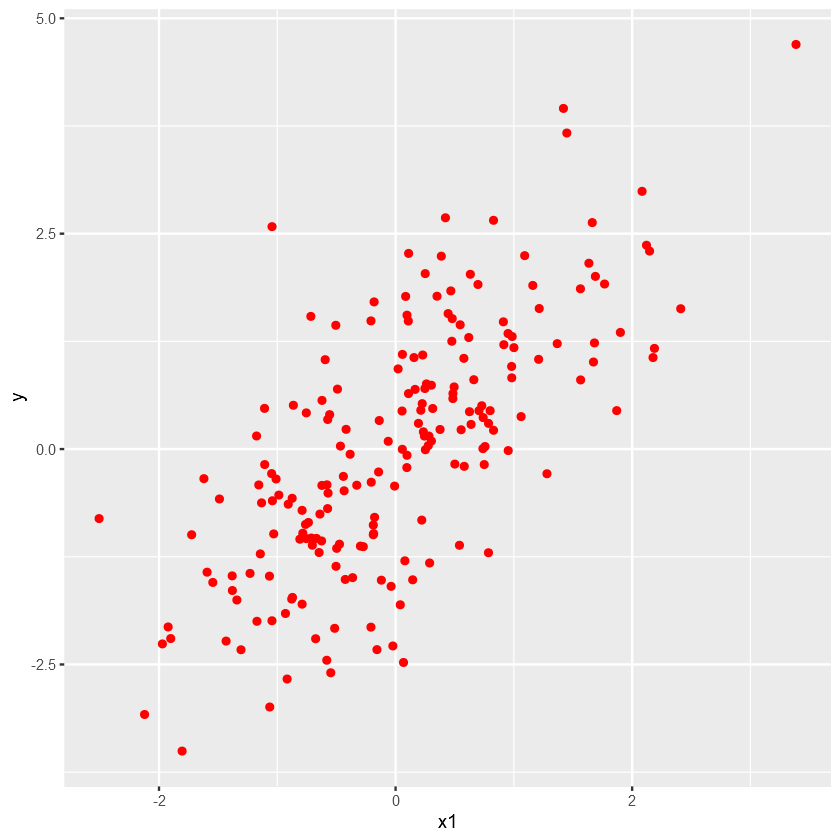

In [5]:
############## Scatter Plot ##############

dataset %>%
 ggplot(aes(x = x1, y = y)) +
 geom_point(colour = "red") 

## OLS Results Using Off-the-Shelf Code

In [6]:
############## Off-the-Shelf OLS estimator ##############

# data has to be in a dataframe (and not matrix) to use the lm command
lmodel <- lm(y ~ x1, data = dataset)
summary(lmodel)


Call:
lm(formula = y ~ x1, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5646 -0.7075 -0.0761  0.6399  3.6352 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01910    0.07315   0.261    0.794    
x1           1.02664    0.07434  13.810   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.034 on 198 degrees of freedom
Multiple R-squared:  0.4906,	Adjusted R-squared:  0.4881 
F-statistic: 190.7 on 1 and 198 DF,  p-value: < 2.2e-16


# Students Exercises

1. Use matrix algebra to calulate the OLS coefficients:
\begin{equation*}
\hat{\beta} = (X'X)^{-1} X'Y.
\end{equation*}




The following R commands might be useful:
- *%*%*: matrix multiplication
- *solve()*: calculates the inverse
- *t()*: calculates the transposed
- *diag(a)*: builds an identity matrix of dimension a
- *for (i in c(1:10)) { }*: loops i in { } from 1 to 10

In [ ]:
############## Put your code here ##############

# Apply OLS formula


#################################################

2. Calulate the variance and standard errors of $\hat{\beta}_0$ and $\hat{\beta}_1$. Use the homoskedastic variance formula
\begin{equation*}
Var(\hat{\beta}) = \sigma^2 (X'X)^{-1},
\end{equation*}
with $\displaystyle \sigma^2 = \frac{1}{N-2} \sum_{i=1}^{N} \hat{u}_i^2$.

In [ ]:
############## Put your code here ##############

# Calulate the error term

# Calculate Sigma-squared with degrees-of-freedom adjustment

# Inverse design matrix

#################################################

3. Calulate the variance and standard errors of $\hat{\beta}_0$ and $\hat{\beta}_1$, using the heteroskedasticity robust Eicker–Huber–White variance formula
\begin{equation*}
Var(\hat{\beta}) = (X'X)^{-1} (X' diag(u_1^2, ..., u_N^2) X )(X'X)^{-1}.
\end{equation*}
How would you make the degree-of-freedom adjustment?


In [ ]:
############## Put your code here ##############

# Calulate diagonal matrix of squared error (using a loop)


# Variance calulation

#################################################

4. Bootstrap the variance and standard errors of $\hat{\beta}_0$ and $\hat{\beta}_1$ (with 9,999 bootstrap replications).

Helpful R commands:
- *srswr()*: draws random sample with replacement 
- *rep(x,times=a)*: repeats a times observations in x 

In [ ]:
############## Put your code here ##############
set.seed(1001)
rep = 9999

# Loop with boostrap resamples

#################################################